## Compare corpus from URN


In [2]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn

%matplotlib inline

In [3]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

In [4]:
# lager et referansekorpus

refurns = nb.get_urn({'year':1970, 'next':60, 'ddk':"839%", 'limit':200})

In [170]:
# lager et referansekorpus

refurns_filosofi = nb.get_urn({'year':1970, 'next':60, 'ddk':"808%", 'limit':200})
reference_philosopy = [r[0] for r in refurns_filosofi]

In [7]:
reference = [r[0] for r in refurns]

Selve korpusene bygges på forskjellige måter, her ved å sammenligne lettlest mot referanse 

In [8]:
lettlest = Corpus_urn(
    urns = urns,
    ref_urns = reference
)

En liten kommando for å sjekke ord mot kvinnekorpus og mannskorpus

In [9]:
def check(target="", reference="", vals=[
    '.'
]):
    #vals = ['hennes','hans','ham','hun','han','Han','Hun']
    kv = check_vals(target, vals)
    me = check_vals(reference, vals)
    me.columns = ['reference']
    kv.columns = ['target']
    return me.join(kv)

Plotter forskjellene på bestemte ord og undersøker korpuset den veien.

In [14]:
lettlest.difference()

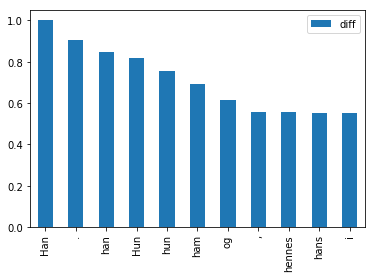

In [15]:
lettlest.search_words( ['hennes','hans','ham','hun','han','Han','Hun', '.', ',','og','i']).plot(kind='bar')

In [16]:
f = nb.get_corpus_text(urns)

In [18]:
nb.normalize_corpus_dataframe(f)

True

In [29]:
r = nb.get_corpus_text(reference)
nb.normalize_corpus_dataframe(r)

True

In [171]:
rfil = nb.get_corpus_text(reference_philosopy)
nb.normalize_corpus_dataframe(rfil)

True

In [27]:
fstat = f.transpose().describe()

In [30]:
rstat = r.transpose().describe()

In [173]:
rfilstat = rfil.transpose().describe()

In [31]:
rstat['.']

count    200.000000
mean       0.084651
std        0.041713
min        0.000000
25%        0.065390
50%        0.080743
75%        0.097636
max        0.452830
Name: ., dtype: float64

In [86]:
fstat['.']

count    81.000000
mean      0.110462
std       0.020922
min       0.071821
25%       0.097661
50%       0.109420
75%       0.126602
max       0.163251
Name: ., dtype: float64

In [174]:
rfilstat['.']

count    199.000000
mean       0.071157
std        0.023105
min        0.019843
25%        0.056834
50%        0.066185
75%        0.080278
max        0.157480
Name: ., dtype: float64

In [88]:
len(reference)

200

In [33]:
fstat['.']['count']

81.0

In [197]:
f.transpose()['.']/f.transpose()[',']

2010050408081    2.162295
2008030604009    1.909516
2010052003119    1.929124
2008020804058    1.507740
2008011000089    2.193646
2009093004032    5.394805
2009030304067    1.803493
2007081300029    2.391304
2012121105068    2.258824
2007111301009    2.517018
2007081004056    5.981763
2013013006060    3.364807
2012092705081    2.233141
2012112808086    3.392857
2012112808117    4.329787
2012121007004    1.960630
2014070905019    1.972403
2012062505048    3.718468
2012092705069    2.733524
2012092706103    3.316964
2010050503036    1.450000
2009042004082    2.857868
2010022303036    1.207843
2011070708028    1.841880
2013082808049    3.089552
2011060106065    2.182119
2013061108167    3.359155
2011060606073    1.704604
2011071308024    1.698539
2009021004116    2.376623
                   ...   
2013012506031    2.069288
2013110405040    2.442177
2013103006006    1.218009
2014071107075    1.150235
2013022506121    2.504545
2013010408136    2.189046
2013041206092    2.571754
201304250600

In [218]:
import pandas as pd

def ratio(frame, val1, val2):
    return pd.DataFrame(frame.dropna()[val1]/frame.dropna()[val2]).dropna()

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import numpy as np
import scipy.stats

def nplot(dfstat, value):
    

    mu = dfstat[value]['mean'] 
    sigma = dfstat[value]['std']
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax = plt.subplot(111)
    ax.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
    return ax

def twoplot(onestat, twostat, value, legends=['target', 'reference']):
    ax = plt.subplot(211)

    one_mu = onestat[value]["mean"]
    two_mu = twostat[value]["mean"]
    one_sigma = onestat[value]["std"]
    two_sigma = twostat[value]["std"]
    mu = (one_mu + two_mu)/2
    left_sigma = min(one_sigma, two_sigma)
    right_sigma = max(one_sigma, two_sigma)
    x =  np.linspace(mu - 4*left_sigma, mu + 4*right_sigma, 100)
    ax.plot(x, scipy.stats.norm.pdf(x, one_mu, one_sigma))
    #ax2 = plt.subplot(212, sharex=ax1)
    ax.plot(x, scipy.stats.norm.pdf(x, two_mu, two_sigma))
    ax.legend(legends)
    return ax

def histplot(numbers, bins=5, color='blue', axis = "", figsize=(30,8)):
    if axis == "":
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(121)
    else:
        ax = axis
    numBins = bins
    ax.hist(numbers,density=True,bins=numBins, color=color,alpha=0.8)
    return ax



In [228]:
ratio(r.transpose(),'.',',')[0]

2014071608005    1.147518
2010080620010    0.787740
2013070305001    2.796230
2011080408007    1.542553
2014092638010    1.917619
2006110701097    1.321142
2008011004119    2.542735
2011052606028    0.960072
2014071006011    2.316456
2015102908074    1.588976
2013070938146    1.609290
2012012008190    1.348148
2014022806058    3.504692
2013012508031    1.752464
2014110708096    1.020364
2009061104013    0.000000
2010083020011    3.063187
2011033005029    2.940568
2013040807150    1.564054
2013121105055    1.347791
2014040408011    1.770302
2013041908144    1.540299
2009050704014    1.836172
2012121207057    1.295455
2010100709016    3.582418
2013041908105    1.831176
2010113008010    1.684380
2014120208247    0.853902
2016020907593    2.130081
2007082300064    3.329412
                   ...   
2008022500032    1.164783
2008102200006    2.541746
2007091801008    0.500471
2010042003098    1.273632
2011031505061    1.685748
2014072305051    2.323193
2013092407174    0.994833
201209190804

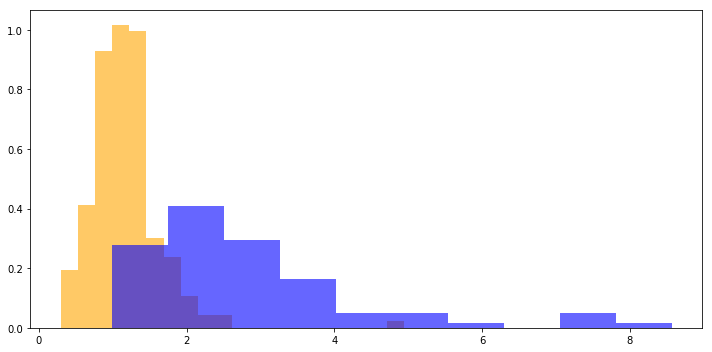

In [248]:
plt.figure(figsize=(10,5))
plt.hist(ratio(rfil.transpose(),'.',',')[0], bins=20, density=True, color='orange', alpha=0.6);
plt.hist(ratio(f.transpose(),'.',',')[0], bins=10, density=True, color='blue', alpha=0.6);
plt.tight_layout()

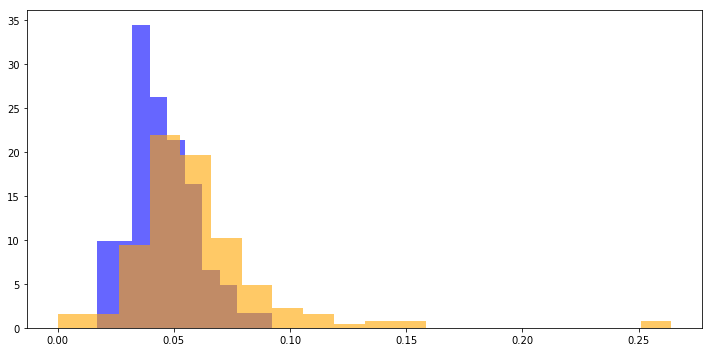

In [250]:
plt.figure(figsize=(10,5))
plt.hist(f.transpose()[','], bins=10, density=True, color='blue', alpha=0.6);
plt.hist(r.transpose()[','], bins=20, density=True, color='orange', alpha = 0.6);
plt.tight_layout()